<a href="https://colab.research.google.com/github/faridrizqi46/CNN/blob/main/CarVsTruck_Acc_92_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"faridrizqis","key":"2a6b85b4b120dc83f15422fb820001a5"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d ryanholbrook/car-or-truck

 79% 61.0M/77.7M [00:00<00:00, 78.3MB/s]
100% 77.7M/77.7M [00:00<00:00, 197MB/s] 


In [ ]:
import zipfile

local_zip = '/content/car-or-truck.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
import os
from PIL import Image
folder_path = '/content/train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
      try:
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
      except:
        os.remove(sub_folder_path + '/' +filee)

In [ ]:
! pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio("/content/valid", output="/content/valid", seed=1337, ratio=(.7, .3), group_prefix=None) # default values

Copying files: 5051 files [00:00, 8891.14 files/s]


In [ ]:
import glob,os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
import os,glob
from keras import applications

In [ ]:
def get_files(dir):
  if not os.path.exists(dir):
    return 0
  count = 0
  for current_path,dirs,files in os.walk(dir):
    for dr in dirs:
      count += len(glob.glob(os.path.join(current_path,dr +'/*')))
  return count

In [ ]:
data_training = get_files('/content/train')
data_val = get_files('/content/valid/valid')
data_test = get_files('/content/valid/test')
num_classes = len(glob.glob('/content/train' + "/*"))

print('jumlah data training :',data_training)
print('jumlah data val :',data_val)
print('jumlah data test :',data_test)
print('jumlah keals dataset :',num_classes)

jumlah data training : 5117
jumlah data val : 3535
jumlah data test : 1515
jumlah keals dataset : 2


In [ ]:
train_dir = '/content/train'
val_dir = '/content/valid/valid'
test_dir = '/content/valid/test'

In [ ]:
train_datagen = ImageDataGenerator(
                rescale = 1/255,
                horizontal_flip=True,
                zoom_range=0.1,
                shear_range=0.1,
                fill_mode='nearest'
                )

test_datagen = ImageDataGenerator(
                rescale = 1/255
                )

val_datagen = ImageDataGenerator(
                rescale = 1/255,
                horizontal_flip=True,
                zoom_range = 0.1,
                shear_range=0.1,
                fill_mode='nearest'
                )

In [ ]:
image_width = 128
image_height = 128

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (image_width,image_height),
                    color_mode = 'rgb',
                    class_mode='binary',
                    batch_size=64,
                    interpolation='nearest'
                    )

val_generator = train_datagen.flow_from_directory(
                    val_dir,
                    target_size = (image_width,image_height),
                    color_mode = 'rgb',
                    class_mode='binary',
                    batch_size=64,
                    interpolation='nearest'
                    )

test_generator = test_datagen.flow_from_directory(
                  test_dir,
                  target_size=(image_width,image_height),
                  color_mode = 'rgb',
                  shuffle=False
                  )

Found 5117 images belonging to 2 classes.
Found 3535 images belonging to 2 classes.
Found 1515 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten
from keras.utils import plot_model
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization,Dropout,AveragePooling2D,BatchNormalization

In [ ]:
model = Sequential()

model.add(Conv2D(128, (3,3), input_shape=(image_width, image_height, 3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               8388736   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

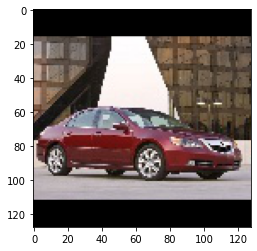

In [ ]:
from keras.preprocessing import image
import numpy as np

img1 = image.load_img('/content/train/Car/00102.jpeg')
plt.imshow(img1)

img1 = image.load_img('/content/train/Car/00102.jpeg', color_mode='rgb')
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

<function matplotlib.pyplot.show>

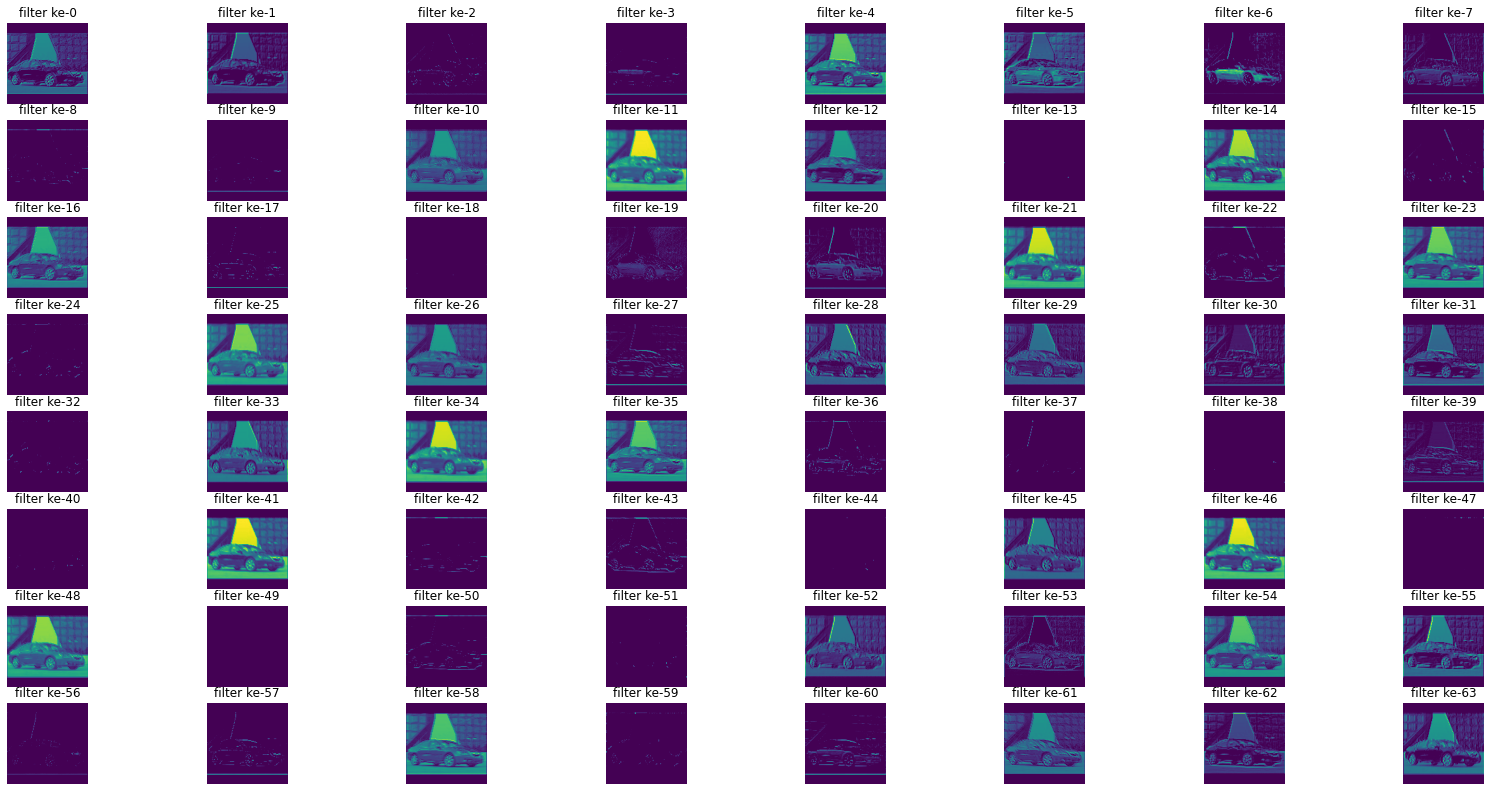

In [ ]:
import matplotlib.image as mpig
from keras.models import  Model

conv_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
conv_features = conv_output.predict(img)

fig = plt.figure(figsize= (28, 14))
columns = 8
rows = 8

for i in range (columns*rows):
  fig.add_subplot(rows, columns, i+1)
  plt.axis('off')
  plt.title('filter ke-' + str(i))
  plt.imshow(conv_features[0, :, :, i])
plt.show

In [ ]:
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
batch_size = 64

train = model.fit(train_generator,
                            epochs=30,
                            steps_per_epoch = train_generator.samples // batch_size,
                            validation_data = val_generator,
                            validation_steps = val_generator.samples // batch_size,
                            verbose = 1)

Epoch 1/30
79/79 [==============================] - 34s 420ms/step - loss: 0.8409 - accuracy: 0.5638 - val_loss: 0.6412 - val_accuracy: 0.6321
Epoch 2/30
79/79 [==============================] - 33s 414ms/step - loss: 0.6340 - accuracy: 0.6371 - val_loss: 0.5754 - val_accuracy: 0.7063
Epoch 3/30
79/79 [==============================] - 33s 415ms/step - loss: 0.5865 - accuracy: 0.6902 - val_loss: 0.5670 - val_accuracy: 0.7054
Epoch 4/30
79/79 [==============================] - 33s 417ms/step - loss: 0.5395 - accuracy: 0.7331 - val_loss: 0.5582 - val_accuracy: 0.7119
Epoch 5/30
79/79 [==============================] - 33s 416ms/step - loss: 0.5343 - accuracy: 0.7358 - val_loss: 0.5293 - val_accuracy: 0.7440
Epoch 6/30
79/79 [==============================] - 33s 413ms/step - loss: 0.4966 - accuracy: 0.7568 - val_loss: 0.5151 - val_accuracy: 0.7489
Epoch 7/30
79/79 [==============================] - 32s 411ms/step - loss: 0.4766 - accuracy: 0.7787 - val_loss: 0.4952 - val_accuracy: 0.7580

In [ ]:
model.save('cartruckV2.h5')

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('/content/cartruckV2.h5')

# Cara test predict #1

In [ ]:
actual = test_generator.classes
actual

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
predicted = model.predict_classes(test_generator, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


48/48 [==============================] - 8s 24ms/step


In [ ]:
predicts = predicted.flatten()

In [ ]:
predicts

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

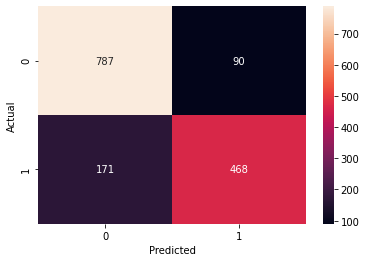

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


data = {'y_Actual':    actual,
        'y_Predicted': predicts
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='.0f')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(actual, predicts))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       877
           1       0.84      0.73      0.78       639

    accuracy                           0.83      1516
   macro avg       0.83      0.81      0.82      1516
weighted avg       0.83      0.83      0.83      1516



In [ ]:
Classes = ['Car','Truck'
            ]

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

import numpy as np

def prepare(img_path):
  img = image.load_img(img_path, target_size=(128,128,3), color_mode='rgb')
  x = image.img_to_array(img)
  x = x/255
  return np.expand_dims(x, axis=0)

In [ ]:
citra_test = '/content/valid/test/Truck/06081.jpeg'

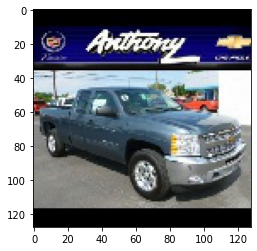

In [ ]:
disease = image.load_img(citra_test, target_size=(128,128,3), color_mode='rgb')
plt.imshow(disease)

In [ ]:
hasil_akhir = model.predict_classes(prepare(citra_test))
hasil_akhir_2 = model.predict(prepare(citra_test))
index = np.argsort(hasil_akhir_2[0,:])
print('          ', Classes[int(hasil_akhir)])

           Truck


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Cara test predict #2

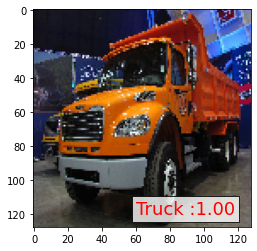

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/Freightliner_M2_106_6x4_2014_(14240376744).jpg', target_size=(128, 128,3))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Truck :%1.2f'%(prediction[0,0])
    plt.text(60, 120,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Car :%1.2f'%(1.0-prediction[0,0])
    plt.text(60, 120,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

# Predict data masuk ke DF

In [ ]:
import pandas as pd
test_generator.reset
ytesthat = model.predict_generator(test_generator)
df = pd.DataFrame({
    'filename':test_generator.filenames,
    'predict2':ytesthat[:,0],
    'y':test_generator.classes
})

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict2']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict2,y,y_pred
0,Car/05118.jpeg,0.03592,0,0
1,Car/05130.jpeg,0.02220,0,0
2,Car/05135.jpeg,0.03187,0,0
3,Car/05138.jpeg,0.00006,0,0
4,Car/05147.jpeg,0.01058,0,0
5,Car/05164.jpeg,0.00690,0,0
6,Car/05191.jpeg,0.00001,0,0
7,Car/05205.jpeg,0.02358,0,0
8,Car/05206.jpeg,0.03547,0,0
9,Car/05208.jpeg,0.79509,0,1


In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 5000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 5000 Validation images : 260


## Cek gambar apa aja yang salah di predict

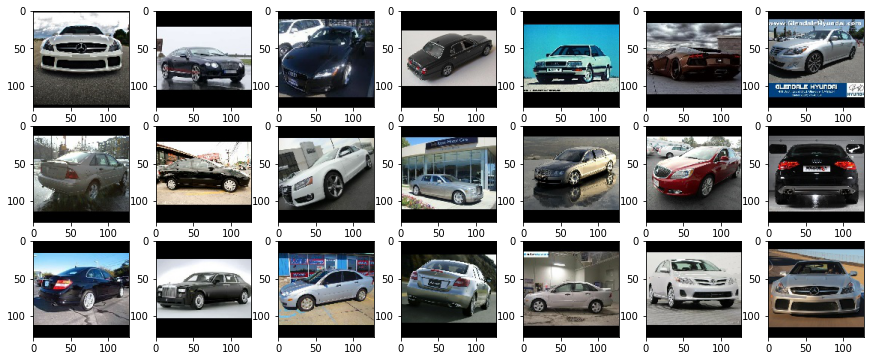

In [ ]:
#Some of Car image misclassified as Truck.
import matplotlib.image as mpimg

CarasTruck = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('/content/valid/test/'+CarasTruck.iloc[i], target_size=(128, 128))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

plt.show()

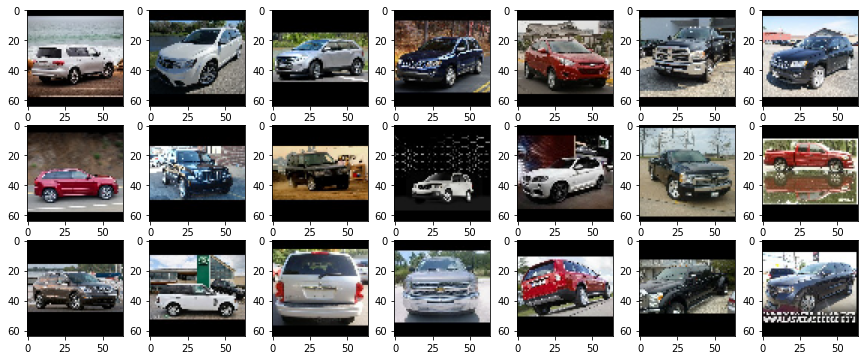

In [ ]:
#Some of Truck image misclassified as Car.
import matplotlib.image as mpimg

TruckasCar = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('/content/valid/test/'+TruckasCar.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

## Predict data random

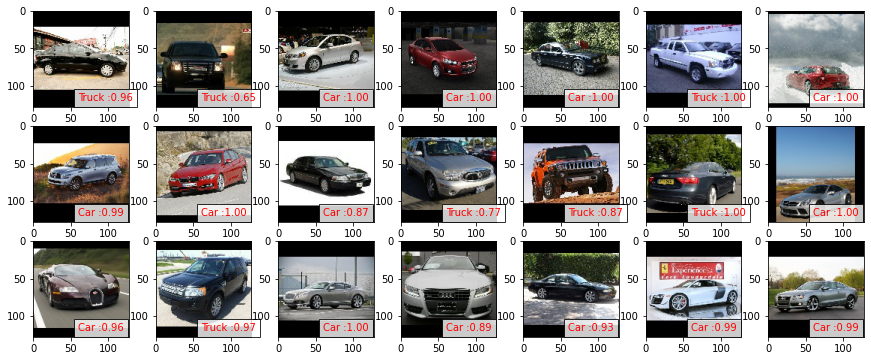

In [ ]:
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('/content/valid/test/'+test_generator.filenames[np.random.choice(range(1515))], target_size=(128, 128))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
      value ='Truck :%1.2f'%(prediction[0,0])
      plt.text(60, 120,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
      value ='Car :%1.2f'%(1.0-prediction[0,0])
      plt.text(60, 120,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)